<a id="ref1"></a>
## ¿Cuál es la diferencia entre regresión lineal y logística?

Si bien la regresión lineal es adecuada para estimar valores continuos (por ejemplo, estimar el precio de la vivienda), no es la mejor herramienta para predecir la clase de un punto de datos observado. Para estimar la clase de un punto de datos, necesitamos algún tipo de orientación sobre cuál sería el <b>clase más probable</b> para ese punto de datos. Para esto utilizamos <b>Regresión logística</b>.

La regresión logística es una variación de la regresión lineal, que se utiliza cuando la variable dependiente observada, <b>y</b>, es categórica. Produce una fórmula que predice la probabilidad de la etiqueta de clase en función de las variables independientes.

La regresión logística se ajusta a una curva especial en forma de S tomando la función de regresión lineal y transformando la estimación numérica en una probabilidad con la siguiente función, que se llama función sigmoidea. 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$ 

O:

$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$


En esta ecuación, ${\theta^TX}$ es el resultado de la regresión (la suma de las variables ponderadas por los coeficientes),`exp` es la función exponencial y $\sigma(\theta^TX)$ Es la sigmoide o [logistic function](http://en.wikipedia.org/wiki/Logistic_function?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01), También llamada curva logística. Es una forma común de "S" (curva sigmoidea).


Entonces, brevemente, la regresión logística pasa la entrada a través del logístico/sigmoide pero luego trata el resultado como una probabilidad:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">


El objetivo del algoritmo __Regresión Logística__, es encontrar los mejores parámetros θ, para $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, de tal manera que el modelo prediga mejor la clase de cada caso.


### Rotación de clientes con regresión logística
Una empresa de telecomunicaciones está preocupada por la cantidad de clientes que abandonan su negocio de telefonía fija por competidores de cable. Necesitan entender quién se va. Imagina que eres analista en esta empresa y tienes que averiguar quién se va y por qué.

Primero importemos las bibliotecas requeridas:


In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

<h2 id="about_dataset">Información del dataset:</h2>

Utilizaremos un conjunto de datos de telecomunicaciones para predecir la pérdida de clientes. Este es un conjunto de datos históricos de clientes donde cada fila representa un cliente. Los datos son relativamente fáciles de entender y usted puede descubrir información que puede utilizar de inmediato. Normalmente es menos costoso conservar clientes que adquirir otros nuevos, por lo que el objetivo de este análisis es predecir los clientes que permanecerán en la empresa.


Este conjunto de datos proporciona información para ayudarle a predecir qué comportamiento le ayudará a retener clientes. Puede analizar todos los datos relevantes de los clientes y desarrollar programas de retención de clientes enfocados.



El conjunto de datos incluye información sobre:

- Clientes que se fueron en el último mes: la columna se llama Rotación
- Servicios a los que se ha registrado cada cliente: teléfono, líneas múltiples, Internet, seguridad en línea, respaldo en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas.
- Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales.
- Información demográfica de los clientes: sexo, rango de edad y si tienen parejas y dependientes.

###  Cargar los datos de Telco Churn
Telco Churn es un archivo de datos hipotético que se refiere a los esfuerzos de una empresa de telecomunicaciones para reducir la rotación de su base de clientes. Cada caso corresponde a un cliente distinto y registra diversa información demográfica y de uso del servicio. Antes de poder trabajar con los datos, debe utilizar la URL para obtener ChurnData.csv.

In [3]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
filename = "ChurnData.csv"

response = requests.get(url)

if response.status_code == 200:
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"Archivo {filename} descargado correctamente.")
else:
    print(f"Error al descargar el archivo: {response.status_code}")

Archivo ChurnData.csv descargado correctamente.


## Cargar datos desde un archivo CSV


In [4]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


<h2 id="preprocessing">
Preprocesamiento y selección de datos.</h2>



Seleccionemos algunas características para el modelado. Además, cambiamos el tipo de datos de destino para que sea un número entero, ya que es un requisito del algoritmo skitlearn:

In [5]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


### Conteo de encabezados y filas

In [6]:
churn_df.shape


(200, 10)

### Definamos X e y para nuestro conjunto de datos:

In [7]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [8]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

Además, normalizamos el conjunto de datos:

In [9]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])


## Conjunto de datos de entrenamiento/prueba


Dividimos nuestro conjunto de datos de entrenamiento y conjunto de prueba:


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)



<h2 id="modeling">Modelado (Regresión Logística con Scikit-learn)</h2>


### Se cargar los datos de entrenamiento a la regresión lineal

In [11]:
##datos de entrenamiento a la regresión


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Ahora podemos predecir usando nuestro conjunto de prueba:

In [12]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

__predict_proba__ devuelve estimaciones para todas las clases, ordenadas por etiqueta de clases. Entonces, la primera columna es la probabilidad de clase 0, P(Y=0|X), y la segunda columna es la probabilidad de clase 1, P(Y=1|X):

In [13]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.


<h2 id="evaluación">Evaluación</h2>


### índice jaccard
Probemos el índice jaccard para evaluar la precisión. Podemos definir jaccard como el tamaño de la intersección dividido por el tamaño de la unión de los dos conjuntos de etiquetas. Si todo el conjunto de etiquetas predichas para una muestra coincide estrictamente con el conjunto verdadero de etiquetas, entonces la precisión del subconjunto es 1,0; de lo contrario es 0,0.


In [14]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7058823529411765


### matriz de confusión
Otra forma de ver la precisión del clasificador es mirar la __matriz de confusión__.


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Etiqueta prevista')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


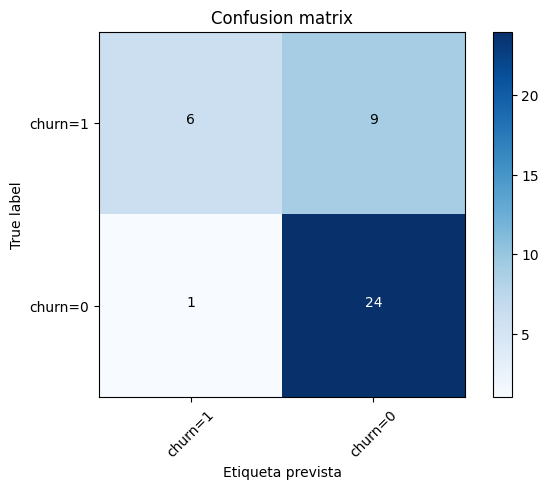

In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Miremos la primera fila. La primera fila es para clientes cuyo valor de abandono real en el conjunto de prueba es 1.
Como puedes calcular, de 40 clientes, el valor de abandono de 15 de ellos es 1.
De estos 15 casos, el clasificador predijo correctamente 6 de ellos como 1 y 9 como 0.

Esto significa que, para 6 clientes, el valor de abandono real fue 1 en el conjunto de prueba y el clasificador también lo predijo correctamente como 1. Sin embargo, aunque la etiqueta real de 9 clientes fue 1, el clasificador los predijo como 0, lo cual no es muy bueno. Podemos considerarlo como el error del modelo de la primera fila.

¿Qué pasa con los clientes con valor de abandono 0? Miremos la segunda fila.
Parece que había 25 clientes cuyo valor de abandono era 0.


El clasificador predijo correctamente 24 de ellos como 0 y uno de ellos erróneamente como 1. Por lo tanto, ha hecho un buen trabajo al predecir los clientes con valor de abandono de 0. Lo bueno de la matriz de confusión es que muestra la capacidad del modelo para predecir o separar correctamente las clases. En un caso específico del clasificador binario, como este ejemplo, podemos interpretar estos números como el recuento de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

Estas métricas te proporcionan una visión más completa del rendimiento del modelo:

__Precisión del 75%:__ Un buen desempeño general del modelo.

__Alta precisión para la clase positiva (96%):__ El modelo es muy confiable cuando predice que un cliente churn.

__Sensibilidad del 72.7%:__ Una buena capacidad para identificar a los clientes que churn.

__Especificidad del 85.7%:__  Una buena capacidad para identificar a los clientes que no churn.


Estas métricas indican que el modelo tiene un buen equilibrio entre predecir correctamente los clientes que churn y los que no churn. Sin embargo, hay margen para mejorar, especialmente en la sensibilidad.

In [16]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



## Interpretación

__Clase 0 (No churn):__ El modelo es muy bueno identificando correctamente los clientes que no churn (alta sensibilidad y buen F1-score).

__Clase 1 (Churn):__ El modelo tiene una alta precisión, pero una baja sensibilidad. Esto significa que, aunque la mayoría de las predicciones de churn son correctas, el modelo no está identificando correctamente a muchos de los clientes que realmente churn.

__Métricas Generales:__ La precisión global del modelo es del 75%, lo cual es aceptable, pero hay una disparidad significativa entre las métricas de las dos clases, especialmente en términos de sensibilidad para la clase 1.

### pérdida de registro
Ahora, probemos __log loss__ para la evaluación. En la regresión logística, el resultado puede ser que la probabilidad de que la pérdida de clientes sea sí (o igual a 1). Esta probabilidad es un valor entre 0 y 1.
La pérdida logarítmica (pérdida logarítmica) mide el rendimiento de un clasificador donde la salida prevista es un valor de probabilidad entre 0 y 1.


In [17]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101185